In [1]:
import rasterio

mars = rasterio.open('../../Planets/mars/data/Mars_MGS_MOLA_DEM_mosaic_global_463m.tif')
mars = mars.read()

In [2]:
import numpy as np
print(mars.shape)
print(np.amin(mars[0]))
print(np.amax(mars[0]))
print(np.amax(mars[0]) + abs(np.amin(mars[0])))

(1, 23040, 46080)
-8201
21241
29442


In [3]:
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
import numpy as np

custom_cmap = LinearSegmentedColormap.from_list('mars', ['#162252',
                                                         '#104E8B',
                                                         '#00B2EE',
                                                         '#00FF00', 
                                                         '#FFFF00',
                                                         '#FFA500',
                                                         '#FF0000', 
                                                         '#8b0000',
                                                         '#964B00', 
                                                         '#808080',
                                                         '#FFFFFF'], N=2350)

bounds = np.arange(-9500, 14000, 10)
norm = BoundaryNorm(bounds, custom_cmap.N)

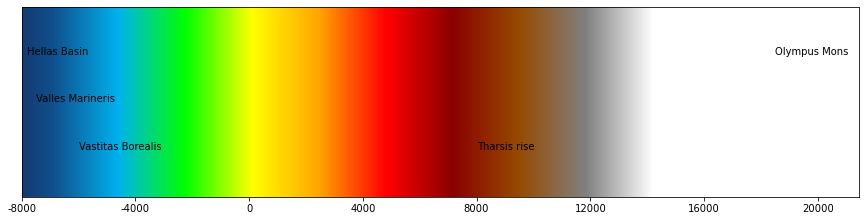

In [4]:
import matplotlib.pyplot as plt

x = np.arange(np.amin(mars[0]), np.amax(mars[0]), 1)
gradient = np.vstack((x, x))

fig, ax = plt.subplots()
fig.set_size_inches(15, 3.5)
plt.imshow(gradient, aspect='auto', cmap=custom_cmap, norm=norm)
plt.text(201, 0, "Hellas Basin")
plt.text(26500, 0, "Olympus Mons")
plt.text(2000, 1, "Vastitas Borealis")
plt.text(16000, 1, "Tharsis rise")
plt.text(501, 0.5, "Valles Marineris")

plt.xticks(ticks=np.arange(0, 30000, 4000), labels=np.arange(-8000, 22000, 4000))
ax.get_yaxis().set_visible(False)
plt.savefig("Outputs/raw1.png", dpi=600)
plt.show()

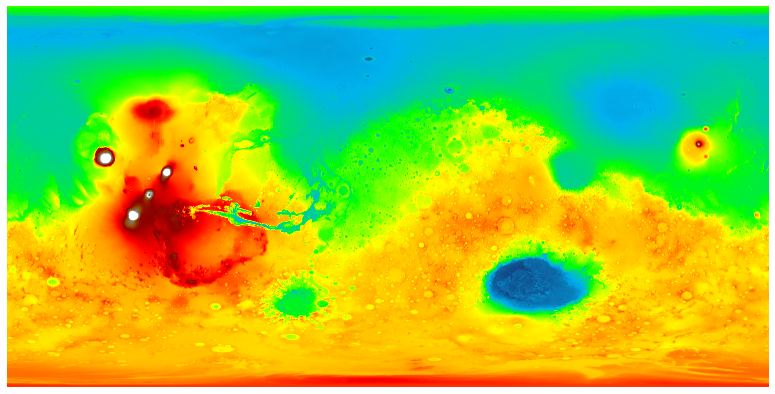

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)

imgs = plt.imshow(mars[0], cmap=custom_cmap, norm=norm)
ax.axis('off')
plt.savefig("Outputs/raw2.png", dpi=600)

plt.show()

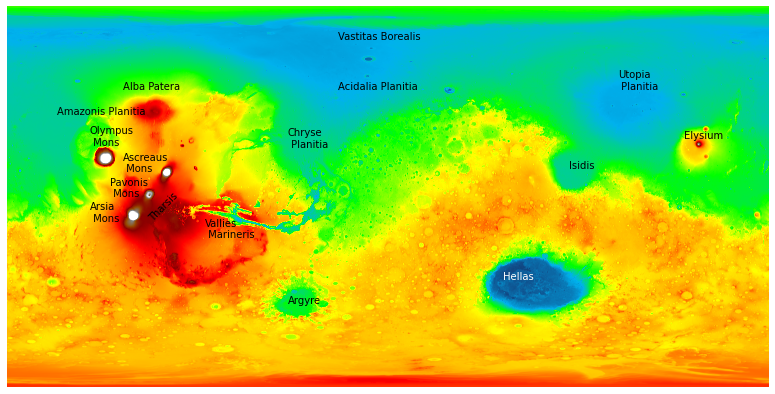

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)

imgs = plt.imshow(mars[0], cmap=custom_cmap, norm=norm)
plt.text(5000, 8400, "Olympus\n Mons")
plt.text(7000, 10000, "Ascreaus\n Mons")
plt.text(6200, 11500, "Pavonis\n Mons")
plt.text(5000, 13000, "Arsia\n Mons")
plt.text(8500, 13000, "Tharsis", rotation=45)
plt.text(12000, 14000, "Vallies\n Marineris")
plt.text(17000, 18000, "Argyre")
plt.text(20000, 2000, "Vastitas Borealis")
plt.text(17000, 8500, "Chryse\n Planitia")
plt.text(20000, 5000, "Acidalia Planitia")
plt.text(30000, 16500, "Hellas", color='white')
plt.text(37000, 5000, "Utopia\n Planitia")
plt.text(41000, 8000, "Elysium")
plt.text(34000, 9800, "Isidis")
plt.text(7000, 5000, "Alba Patera")
plt.text(2000, 6500, "Amazonis\n Planitia")

ax.axis('off')
plt.savefig("Outputs/raw3.png", dpi=600)

plt.show()

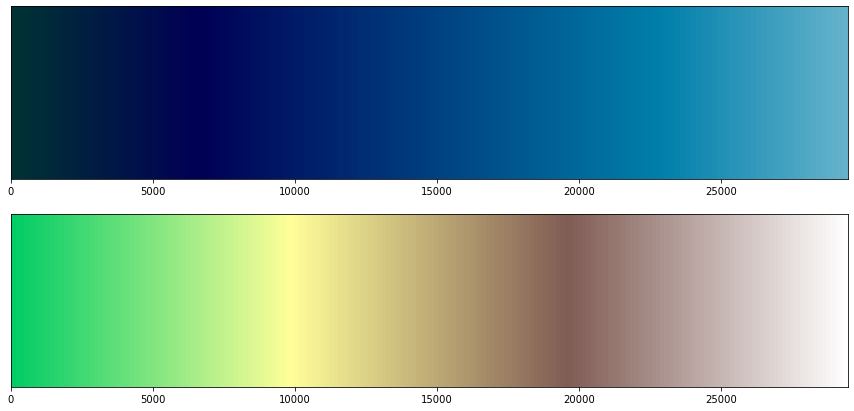

In [8]:
colors_undersea = plt.cm.ocean(np.linspace(0.2, 0.8, 800))
undersea_map = LinearSegmentedColormap.from_list('undersea_map', colors_undersea, N=800)

colors_land = plt.cm.terrain(np.linspace(0.25, 1, 1400))
land_map = LinearSegmentedColormap.from_list('land_map', colors_land, N=1400)

x = np.arange(np.amin(mars[0]), np.amax(mars[0]), 1)
gradient = np.vstack((x, x))

fig = plt.figure()
ax1 = plt.subplot(2,1,1)
fig.set_size_inches(15, 7)
ax1.imshow(gradient, aspect='auto', cmap=undersea_map)
ax1.get_yaxis().set_visible(False)

ax2 = plt.subplot(2,1,2)
ax2.imshow(gradient, aspect='auto', cmap=land_map)
ax2.get_yaxis().set_visible(False)
plt.savefig("Outputs/raw4.png", dpi=600)

plt.show()

In [9]:
colors = np.vstack((colors_undersea, colors_land))
terrain_map = LinearSegmentedColormap.from_list('cut_terrain', colors, N=2221)

bounds = np.arange(-8210, 14000, 10)
norm = BoundaryNorm(bounds, terrain_map.N)

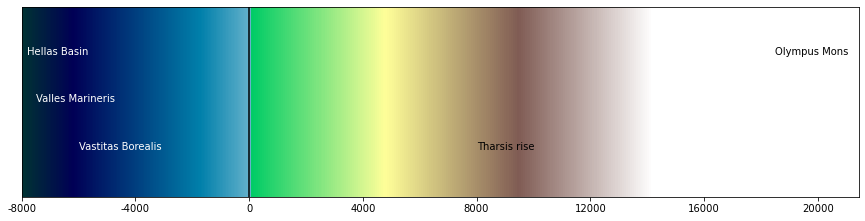

In [10]:
x = np.arange(np.amin(mars[0]), np.amax(mars[0]), 1)
gradient = np.vstack((x, x))

fig, ax = plt.subplots()
fig.set_size_inches(15, 3.5)
plt.imshow(gradient, aspect='auto', cmap=terrain_map, norm=norm)
plt.text(201, 0, "Hellas Basin", color='white')
plt.text(26500, 0, "Olympus Mons")
plt.text(2000, 1, "Vastitas Borealis", color='white')
plt.text(16000, 1, "Tharsis rise")
plt.text(501, 0.5, "Valles Marineris", color='white')
plt.axvline(0+8000, color='black')

plt.xticks(ticks=np.arange(0, 30000, 4000), labels=np.arange(-8000, 22000, 4000))
ax.get_yaxis().set_visible(False)
plt.savefig("Outputs/raw5.png", dpi=600)

plt.show()

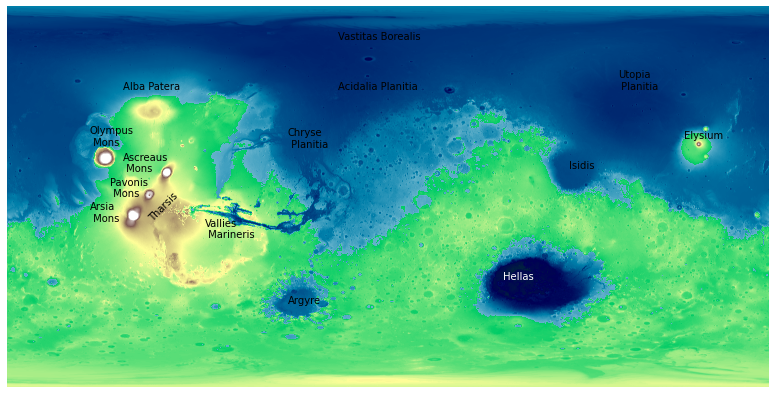

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)

imgs = plt.imshow(mars[0], cmap=terrain_map, norm=norm)
plt.text(5000, 8400, "Olympus\n Mons")
plt.text(7000, 10000, "Ascreaus\n Mons")
plt.text(6200, 11500, "Pavonis\n Mons")
plt.text(5000, 13000, "Arsia\n Mons")
plt.text(8500, 13000, "Tharsis", rotation=45)
plt.text(12000, 14000, "Vallies\n Marineris")
plt.text(17000, 18000, "Argyre")
plt.text(20000, 2000, "Vastitas Borealis")
plt.text(17000, 8500, "Chryse\n Planitia")
plt.text(20000, 5000, "Acidalia Planitia")
plt.text(30000, 16500, "Hellas", color='white')
plt.text(37000, 5000, "Utopia\n Planitia")
plt.text(41000, 8000, "Elysium")
plt.text(34000, 9800, "Isidis")
plt.text(7000, 5000, "Alba Patera")
ax.axis('off')
plt.savefig("Outputs/raw6.png", dpi=600)

plt.show()

In [12]:
def change_sea_level(new_sea_level):
    new_sea_level = new_sea_level / 10
    undersea = int(800 + new_sea_level)
    land = int(1400 - new_sea_level)
    colors_undersea = plt.cm.ocean(np.linspace(0.2, 0.8, undersea))
    undersea_map = LinearSegmentedColormap.from_list('undersea_map', colors_undersea, N=undersea)

    colors_land = plt.cm.terrain(np.linspace(0.25, 1, land))
    land_map = LinearSegmentedColormap.from_list('land_map', colors_land, N=land)

    colors = np.vstack((colors_undersea, colors_land))
    terrain_map = LinearSegmentedColormap.from_list('cut_terrain', colors, N=2221)

    bounds = np.arange(-8210, 14000, 10)
    norm = BoundaryNorm(bounds, terrain_map.N)
    return terrain_map, norm

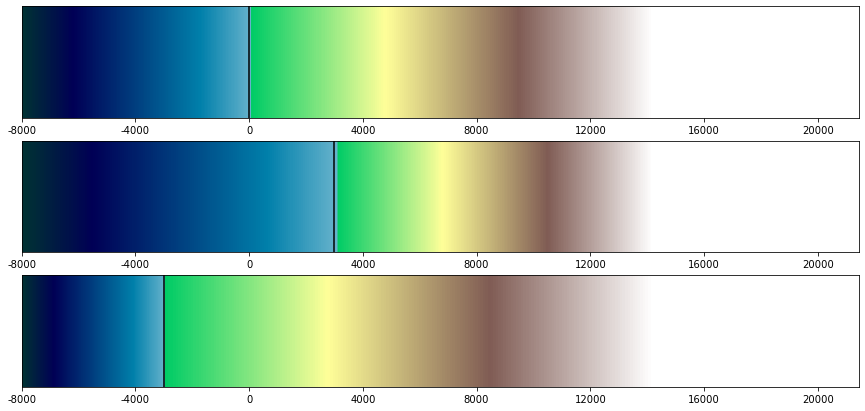

In [13]:
terrain_map0, norm0 = change_sea_level(new_sea_level = 0)
terrain_map3000, norm3000 = change_sea_level(new_sea_level = 3000)
terrain_map_3000, norm_3000 = change_sea_level(new_sea_level = -3000)

x = np.arange(np.amin(mars[0]), np.amax(mars[0]), 1)
gradient = np.vstack((x, x))

fig = plt.figure()
ax1 = plt.subplot(3,1,1)
fig.set_size_inches(15, 7)
ax1.imshow(gradient, aspect='auto', cmap=terrain_map0, norm=norm0)
ax1.axvline(0+8000, color='black')
ax1.set_xticks(ticks=np.arange(0, 30000, 4000))
ax1.set_xticklabels(labels=np.arange(-8000, 22000, 4000))
ax1.get_yaxis().set_visible(False)

ax2 = plt.subplot(3,1,2)
ax2.imshow(gradient, aspect='auto', cmap=terrain_map3000, norm=norm3000)
ax2.axvline(3000+8000, color='black')
ax2.set_xticks(ticks=np.arange(0, 30000, 4000))
ax2.set_xticklabels(labels=np.arange(-8000, 22000, 4000))
ax2.get_yaxis().set_visible(False)

ax3 = plt.subplot(3,1,3)
ax3.imshow(gradient, aspect='auto', cmap=terrain_map_3000, norm=norm_3000)
ax3.axvline(-3000+8000, color='black')
ax3.set_xticks(ticks=np.arange(0, 30000, 4000))
ax3.set_xticklabels(labels=np.arange(-8000, 22000, 4000))
ax3.get_yaxis().set_visible(False)
plt.savefig("Outputs/raw7.png", dpi=600)

plt.show()

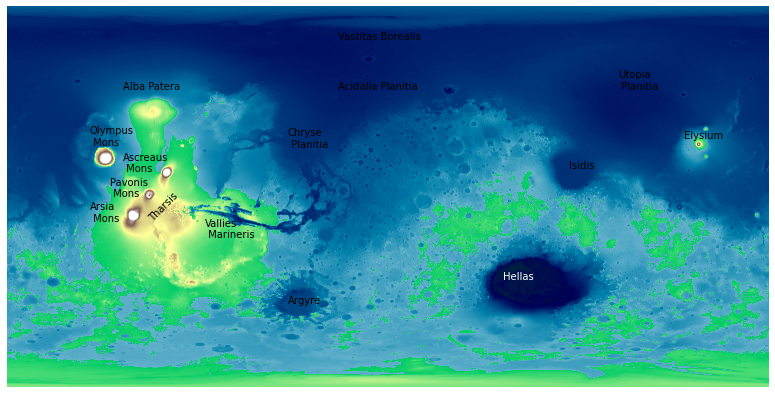

In [14]:
terrain_map, norm = change_sea_level(new_sea_level = 1000)


fig, ax = plt.subplots()
fig.set_size_inches(14, 7)

imgs = plt.imshow(mars[0], cmap=terrain_map, norm=norm)
plt.text(5000, 8400, "Olympus\n Mons")
plt.text(7000, 10000, "Ascreaus\n Mons")
plt.text(6200, 11500, "Pavonis\n Mons")
plt.text(5000, 13000, "Arsia\n Mons")
plt.text(8500, 13000, "Tharsis", rotation=45)
plt.text(12000, 14000, "Vallies\n Marineris")
plt.text(17000, 18000, "Argyre")
plt.text(20000, 2000, "Vastitas Borealis")
plt.text(17000, 8500, "Chryse\n Planitia")
plt.text(20000, 5000, "Acidalia Planitia")
plt.text(30000, 16500, "Hellas", color='white')
plt.text(37000, 5000, "Utopia\n Planitia")
plt.text(41000, 8000, "Elysium")
plt.text(34000, 9800, "Isidis")
plt.text(7000, 5000, "Alba Patera")
ax.axis('off')
plt.savefig("Outputs/raw8.png", dpi=600)

plt.show()

In [ ]:
=

In [ ]:
import earthpy as et
import earthpy.spatial as es

hillshade = es.hillshade(mars[0], azimuth=250, altitude=1)
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
plt.imshow(mars[0], cmap=terrain_map, norm=norm)
plt.imshow(hillshade, cmap="Greys", alpha=0.2)
ax.axis('off')
plt.show()